In [2]:
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud

# Load captions file
captions_file_path = 'captions.txt'
captions_df = pd.read_csv(captions_file_path, delimiter=',', header=None, names=['ImageID', 'Caption'])

# Display the first few rows of the captions dataframe
captions_df.head()

,ImageID,Caption
0,image,caption
1,1000092795.jpg,Two young guys with shaggy hair look at their...
2,1000092795.jpg,"Two young , White males are outside near many..."
3,1000092795.jpg,Two men in green shirts are standing in a yard .
4,1000092795.jpg,A man in a blue shirt standing in a garden .


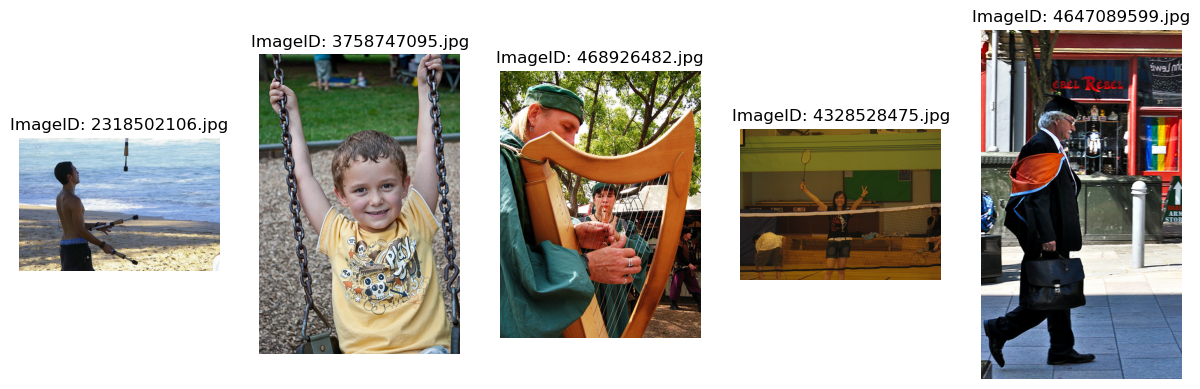

In [9]:
# Define the directory containing the images
images_dir = 'Images'

# Display some sample images
sample_images = captions_df['ImageID'].sample(5).tolist()

plt.figure(figsize=(15, 8))
for i, img_id in enumerate(sample_images, 1):
    img_path = os.path.join(images_dir, img_id)  
    img = Image.open(img_path)
    
    plt.subplot(1, 5, i)
    plt.imshow(img)
    plt.title(f"ImageID: {img_id}")
    plt.axis('off')

plt.show()

Number of unique images: 31784
Number of unique captions: 158440


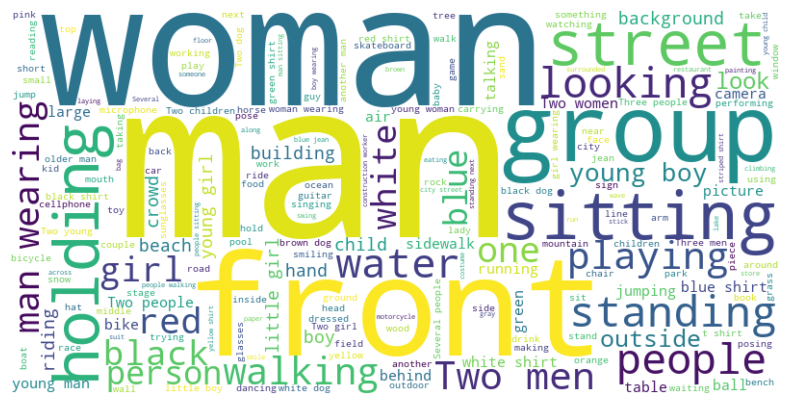

In [11]:
# Convert 'Caption' column to strings
captions_df['Caption'] = captions_df['Caption'].astype(str)

# Calculate the number of unique images and unique captions
unique_images = captions_df['ImageID'].nunique()
unique_captions = captions_df['Caption'].nunique()

# Display basic statistics
print(f"Number of unique images: {unique_images}")
print(f"Number of unique captions: {unique_captions}")

# Display word cloud of captions
all_captions = ' '.join(captions_df['Caption'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_captions)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


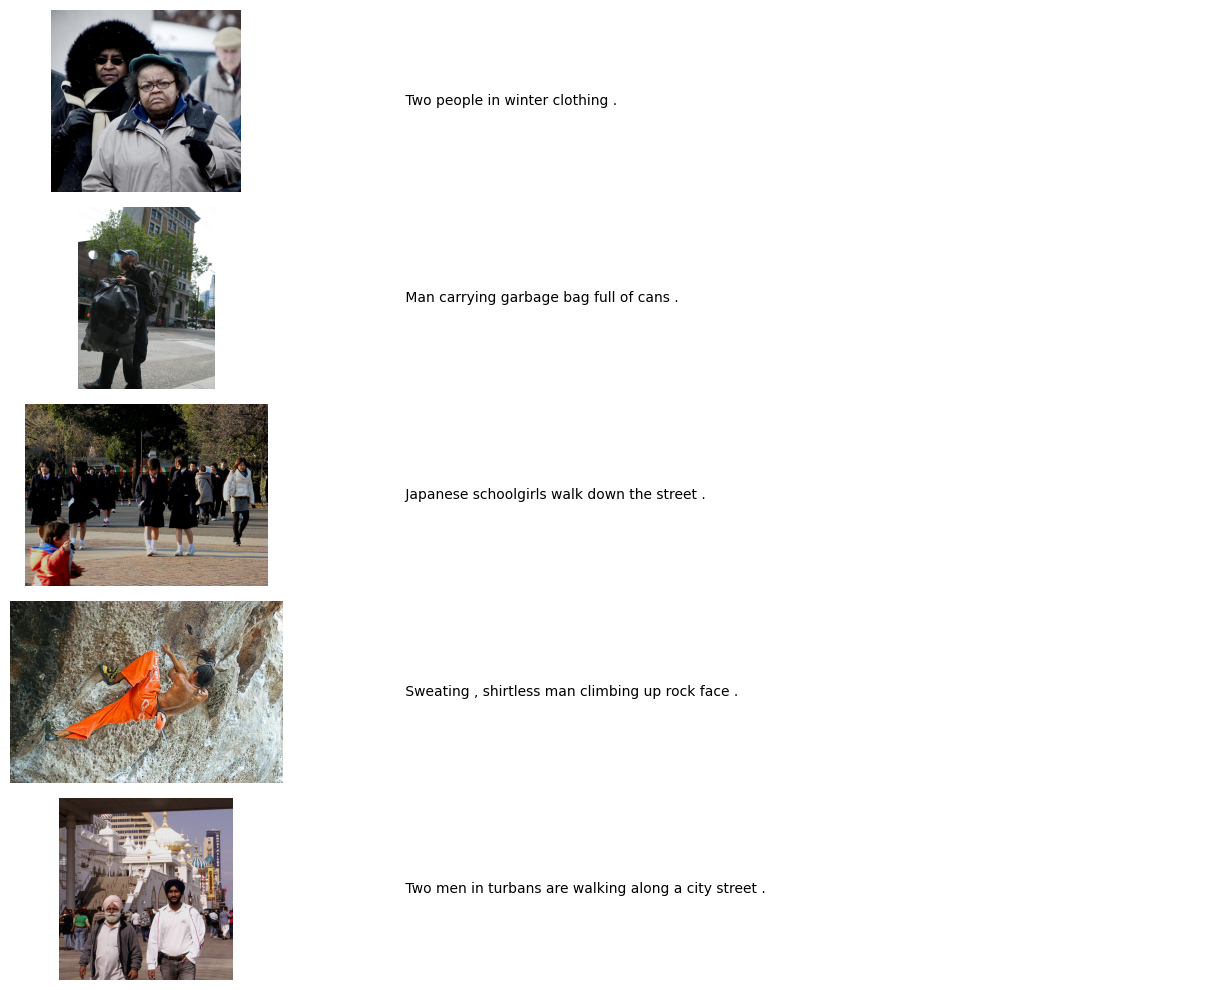

In [20]:
import numpy as np

# Define the directory containing the images
images_dir = 'Images'

# Sample a few images from the dataset
sample_df = captions_df.sample(5)  # Adjust the sample size as needed

# Display images with captions
plt.figure(figsize=(15, 10))
for i, (img_id, caption) in enumerate(sample_df[['ImageID', 'Caption']].itertuples(index=False), 1):
    img_path = os.path.join(images_dir, f"{img_id}")
    img = Image.open(img_path)
    
    plt.subplot(5, 2, i * 2 - 1)
    plt.imshow(img)
    plt.axis('off')
    
    plt.subplot(5, 2, i * 2)
    plt.text(0, 0.5, f"{caption}", fontsize=10, ha='left', va='center', wrap=True)
    plt.axis('off')

plt.tight_layout()
plt.show()